In [96]:
import requests
import json
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt

In [4]:
BOULDER_COORDINATES = "40.0338,-105.2561"
API_URL = "https://api.weather.gov/points/"
BOULDER_URL = API_URL + BOULDER_COORDINATES

In [11]:
%matplotlib inline

In [38]:
overview_page = json.loads(requests.get(BOULDER_URL).text)
hourly_target_url = json.dumps(page['properties']['forecastHourly'], indent=4)[1:-1]
forecast_page = json.loads(requests.get(hourly_target_url).text)
print(hourly_target_url)
hourly_forecast = forecast_page['properties']['periods']

https://api.weather.gov/gridpoints/BOU/54,75/forecast/hourly


In [128]:
tomorrow = datetime.today() + timedelta(days=1)

In [133]:
temps = []
winds = []
for h in hourly_forecast:
    hour_dt = datetime.strptime(h['startTime'][:-9], '%Y-%m-%dT%H:%M')
    if hour_dt.date() == tomorrow.date():
#         print(hour_dt)
#         print(f"Temperature: {h['temperature']}")
#         print(f"Wind Speed: {h['windSpeed'].split()[0]}")
        temps.append(int(h['temperature']))
        winds.append(int(h['windSpeed'].split()[0]))

In [134]:
print(temps)
print(winds)
print('\n')
print(f"Min/Max temp: {min(temps)}/{max(temps)}")
print(f"Max wind: {max(winds)}")

[30, 28, 27, 26, 24, 24, 25, 29, 34, 39, 44, 47, 50, 52, 53, 55, 56, 56, 54, 50, 45, 40, 37, 36]
[6, 6, 6, 6, 7, 7, 6, 6, 5, 3, 3, 5, 6, 6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7]


Min/Max temp: 24/56
Max wind: 7


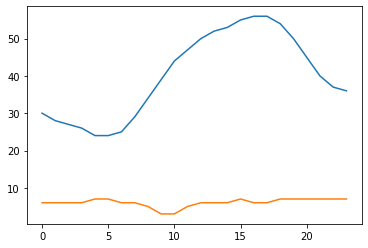

In [135]:
plt.plot(temps)
plt.plot(winds)
plt.show()